In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from src.pinn_blackscholes import BlackScholesPINN
from src.expilcit_bs_fd import FiniteDifferenceBS

In [19]:
bs_pinn = BlackScholesPINN(seed=123)
loss_history = bs_pinn.train_model(epochs=6000, lr=0.001, N_INPUT=2, N_OUTPUT=1, N_HIDDEN=8, N_LAYERS=5)

Epoch: 0 | Loss0: 0.11974342215025391, Loss1: 113.83030604794769, Loss2: -0.013242359958011424, Loss_t_0: 22.304177022458624
Epoch: 100 | Loss0: 2.151489248597611, Loss1: 63.59244157594366, Loss2: 0.017758014346280764, Loss_t_0: 11.288678163848076
Epoch: 200 | Loss0: 3.286695268885161, Loss1: 1.9142950668951562, Loss2: -0.0876237631545139, Loss_t_0: 8.150394117786206
Epoch: 300 | Loss0: 0.7881392768033518, Loss1: 0.6943910760463439, Loss2: 0.027216990377023454, Loss_t_0: 4.461361826785955
Epoch: 400 | Loss0: 0.06419956940450708, Loss1: 0.1783624794867114, Loss2: 0.0018989636524365024, Loss_t_0: 1.443888011620958
Epoch: 500 | Loss0: 0.001545035781523067, Loss1: 0.006430668287146684, Loss2: -0.0007833119204906476, Loss_t_0: 0.20900040774853945
Epoch: 600 | Loss0: 0.01042086749660196, Loss1: 0.00025926234679002363, Loss2: 0.0006504270498411952, Loss_t_0: 0.05387531914039225
Epoch: 700 | Loss0: 0.008101880179587217, Loss1: 0.0009415074967130952, Loss2: -0.0004590331977292296, Loss_t_0: 0.0

In [12]:
fd_bs = FiniteDifferenceBS()
fd_bs.run_simulation()

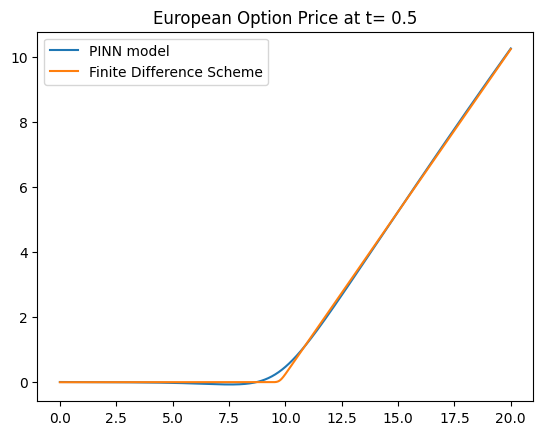

In [42]:
%matplotlib inline
time_index = len(fd_bs.tau)//2


S = fd_bs.Smin + fd_bs.ds*(np.arange(0,fd_bs.Ns+1))  # range of S from Smin to Smax
tau = np.ones_like(S)*(fd_bs.tau[time_index]) # range of time t from Tmin to Tmax

S_ten = torch.tensor(S,device=bs_pinn.device,dtype=bs_pinn.dtype)
t_ten = torch.tensor(tau,device=bs_pinn.device,dtype=bs_pinn.dtype)

data_test = torch.column_stack((t_ten,S_ten))
pred = bs_pinn.model(data_test)
c_pinn = pred[:,0]

plt.plot(S,c_pinn.detach().to('cpu').numpy(),label="PINN model")
plt.plot(fd_bs.S,fd_bs.C[time_index,:],label="Finite Difference Scheme")
plt.title(f"European Option Price at t= {fd_bs.tau[time_index]}")
plt.legend()
plt.show()
plt.savefig("Option_Price_at_time_Tby2")
plt.close()


In [23]:
c_pinn.detach().to('cpu').numpy()

RuntimeError: Numpy is not available